ASSIGNMNET 1 
Breast Cancer Classification SVM & Random Forest

Submitted by :Neha Joseph

In [1]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C://Users//reshm//Downloads//data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#New data with "M"=1 and "B"=0
data1=data.copy()
def classifier(data1):
    if data1["diagnosis"]=="M":
        return "1"
    else:
        return "0"
data1["diagnosis"] = data1.apply(classifier, axis=1) 
data1.replace([np.inf, -np.inf], np.nan, inplace=True) 
data1["diagnosis"]=pd.to_numeric(data1["diagnosis"],errors="coerce") 

In [4]:
print(data1.columns,data.shape)
print(data1.info())
print(data1.describe().T)
print(data1.nunique())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean   

B    357
M    212
Name: diagnosis, dtype: int64


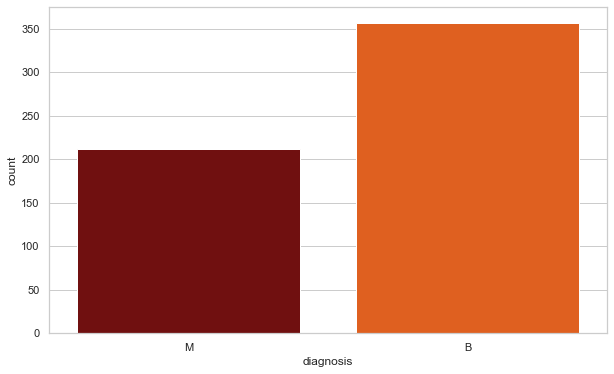

In [5]:
sns.set(style="whitegrid") 
print(data['diagnosis'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('diagnosis', data=data, palette='gist_heat')
plt.show()

##### Test and train split and feature scaling

In [6]:
X=data1.iloc[:,2:32]
Y=data1.iloc[:,1]

for col in X.columns:
    X[col][np.isinf(X[col])]=X[col].mean()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
selected_features=data1.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index

X_train = X_train[selected_features]
X_test = X_test[selected_features]


In [8]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

### SVM 

In [9]:
svm=SVC(kernel="rbf",random_state=0)
svm.fit(X_train,Y_train)

SVC(random_state=0)

Precision: 1.0 
Recall: 0.957 
F1-Score: 0.978 
Accuracy: 98.25% 



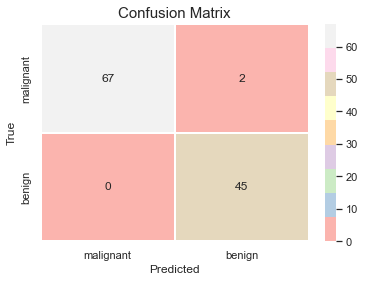

In [10]:
Y_pred=svm.predict(X_test)
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
SVM_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), SVM_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Random Forest

Precision: 0.979 
Recall: 0.979 
F1-Score: 0.979 
Accuracy: 98.25% 



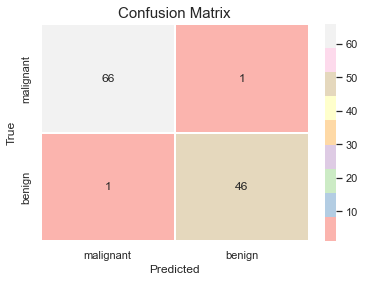

In [11]:
rfc=RandomForestClassifier(n_estimators=60,random_state=0)
rfc.fit(X_train,Y_train)

Y_pred=rfc.predict(X_test)

cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
Random_forest_classifier_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Random_forest_classifier_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
